**Students Perfomance**

**Introduction**

- Undoubtedly, one of the most important concern of society is education. Knowledge and information were for a long time resources not available for all population. Fortunately, we had advanced a lot in the access of education for most of the people helping to improve the social indicators.

- Nevertheless, there are distinctions in the exam perfomances among students. Understading what are the reasons for those distinctions may help policy makers to formualte better education program for the society.

- Seen in these terms, I will apply a linear regression over the grade of the students using their social background. The idea is to find evidences if, and how, social background may affect the students perfomance.

**Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import math

# Graphs
import matplotlib.pyplot as plt
import seaborn as sns

# Stats
from scipy import stats
import statsmodels.api as sm

**Loading the data and reading it in dataframe 'edudata'**

In [2]:
eduData = pd.read_csv("StudentsPerformance.csv")

In [4]:
eduData.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


An overview over the data shows us that the dataset contains eight variables and one thousand observations (students). Basics statistics shows us that the grade avarage of Math is lower than for Reading and Writing. Also, it is possible to notice that one person has zero score in the Math Score Grade.

In [5]:
# Type of the Variables
print(eduData.info())

# Checking for duplicates
print(eduData[eduData.duplicated()])

# Cheking for unique values
for i in eduData.columns:
    print("Unique value for the column: " + i)
    print(eduData[i].unique())
    print("\n")

# Basic Statistics
eduData.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
Empty DataFrame
Columns: [gender, race/ethnicity, parental level of education, lunch, test preparation course, math score, reading score, writing score]
Index: []
Unique value for the column: gender
['female' 'male']


Unique value for the column: race/ethnicity
['grou

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Cleaning the Data**

- One of the most important and dificult process in the data analysis is the cleaning of our data. Fixing or removing incorrect, corrupted, duplicates, or incomplete data demands not only formal understading, but also a sense of interpretation of the dataset.

- We noticed that one person had a zero score in the math test. Usually I would drop this observation from the dataset for being a probably input error, but checking the the other grades of that studend I realise that actually the general grades are very low. Therefore, I will keep the observation in the datase

In [6]:
eduData[eduData['math score'] == 0] 

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0,17,10


None of the dataset observations are null.


In [7]:
# Checking for NULL values
print(eduData.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


**Data Transformation**

Most of the variables are categorial. Nevertheless, when we import the dataset to our analysis environment the system interpret them as strings. Because of that I apply a transformation in the columns of my dataset.

In [8]:
### Data Transformation
for i in eduData.columns[0:5]:
    print("Applying transformation in the data column: " + i)
    eduData[i] = pd.Categorical(eduData[i])
    print("\n")

Applying transformation in the data column: gender


Applying transformation in the data column: race/ethnicity


Applying transformation in the data column: parental level of education


Applying transformation in the data column: lunch


Applying transformation in the data column: test preparation course




**Exploratory Analysis**

It is used to analyze and investigate data in many ways. Is it important to summarize the main characteristics that contains the data for subsequent data modeling. The main idea is to look the data to identify patterns, interesting relations among the variables, and anomalous characteristics.

- Boxplot is one of the most important tools in the descriptive statistics. Visually show the distribution of numerical data through the data quartiles. I ploted boxplots for each categorical variable using the grades archive by the students.

- Gender vs Subject: noticeable that female students has less grade in Math subjects than males; However, male students has less grade in Reading and Writing score; Standard Deviation is very similar for both genders.

- Race/Ethnicity vs Subject: when checking the boxplot through race/ethnicity there is a slight increase for each group from A to E.

- Parental Level of Education by Subject: students whose parents has high level of education hold better grades score.

- Lunch by Subject: It is very clear that students with standard lunch hold better grades scores.

- Test Preparation Course by Subject: The same pattern is noticeable in test preparation course, students that receive a preparion course hold better grades score.

Other descriptive analysys show that the data is unbalanced for Race/Ethnicity, probably reflecting the inequallity present among the students. Also, among the parents is posible to see that many of them hold a lack of formal education what may be associate with low perfomance of few students.

Text(0.5, 1.0, 'Writing Score')

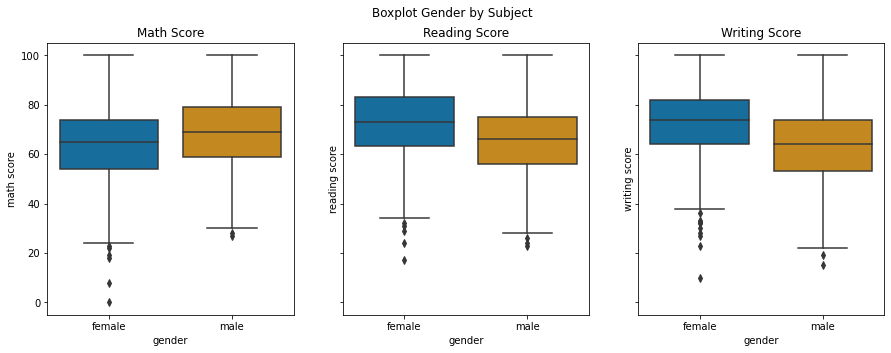

In [10]:
# Creating Boxplot Gender vs Subject

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Boxplot Gender by Subject')

# Math Score
sns.boxplot(ax=axes[0], y='math score', x='gender', 
                 data=eduData, 
                 palette="colorblind")
axes[0].set_title("Math Score")


# Reading Score
sns.boxplot(ax=axes[1], y='reading score', x='gender', 
                 data=eduData, 
                 palette="colorblind")
axes[1].set_title("Reading Score")

# Writing Score
sns.boxplot(ax=axes[2], y='writing score', x='gender', 
                 data=eduData, 
                 palette="colorblind")
axes[2].set_title("Writing Score")

**Grouping by Gender**

In [11]:
print(eduData.groupby(['gender']).median()[['math score','reading score','writing score']])

print(eduData.groupby(['gender']).std()[['math score','reading score','writing score']])

        math score  reading score  writing score
gender                                          
female          65             73             74
male            69             66             64
        math score  reading score  writing score
gender                                          
female   15.491453      14.378245      14.844842
male     14.356277      13.931832      14.113832


Text(0.5, 1.0, 'Writing Score')

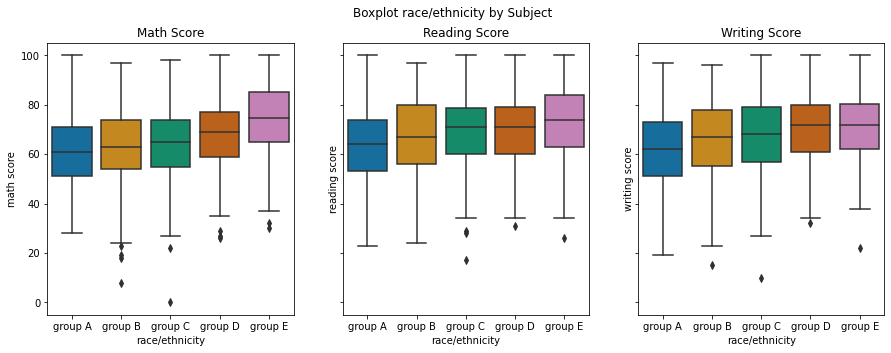

In [12]:
# Creating Boxplot Race/Ethnicity vs Subject

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Boxplot race/ethnicity by Subject')

# Math Score
sns.boxplot(ax=axes[0], y='math score', x='race/ethnicity', 
                 data=eduData, 
                 palette="colorblind")
axes[0].set_title("Math Score")


# Reading Score
sns.boxplot(ax=axes[1], y='reading score', x='race/ethnicity', 
                 data=eduData, 
                 palette="colorblind")
axes[1].set_title("Reading Score")

# Writing Score
sns.boxplot(ax=axes[2], y='writing score', x='race/ethnicity', 
                 data=eduData, 
                 palette="colorblind")
axes[2].set_title("Writing Score")

**Grouping by race**

In [13]:
print(eduData.groupby(['race/ethnicity']).median()[['math score','reading score','writing score']])

print(eduData.groupby(['race/ethnicity']).std()[['math score','reading score','writing score']])

                math score  reading score  writing score
race/ethnicity                                          
group A               61.0           64.0           62.0
group B               63.0           67.0           67.0
group C               65.0           71.0           68.0
group D               69.0           71.0           72.0
group E               74.5           74.0           72.0
                math score  reading score  writing score
race/ethnicity                                          
group A          14.523008      15.543762      15.468278
group B          15.468191      15.177499      15.625173
group C          14.852666      13.997033      14.983378
group D          13.769386      13.895306      14.367707
group E          15.534259      14.874024      15.113906


**Visual**

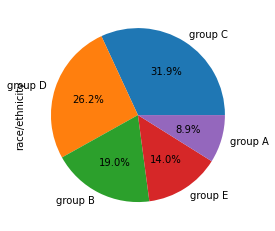

In [14]:
eduData['race/ethnicity'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

**Creating Boxplot Parental Level of Education vs Subject**

Text(0.5, 1.0, 'Writing Score')

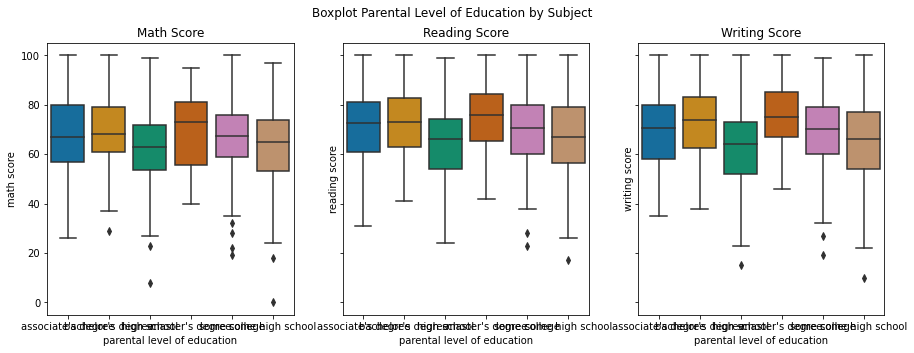

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Boxplot Parental Level of Education by Subject')

# Math Score
sns.boxplot(ax=axes[0], y='math score', x='parental level of education', 
                 data=eduData, 
                 palette="colorblind")
axes[0].set_title("Math Score")


# Reading Score
sns.boxplot(ax=axes[1], y='reading score', x='parental level of education', 
                 data=eduData, 
                 palette="colorblind")
axes[1].set_title("Reading Score")

# Writing Score
sns.boxplot(ax=axes[2], y='writing score', x='parental level of education', 
                 data=eduData, 
                 palette="colorblind")
axes[2].set_title("Writing Score")

**Group by parent level of education**

In [17]:
print(eduData.groupby(['parental level of education']).median()[['math score','reading score','writing score']])

print(eduData.groupby(['parental level of education']).std()[['math score','reading score','writing score']])

                             math score  reading score  writing score
parental level of education                                          
associate's degree                 67.0           72.5           70.5
bachelor's degree                  68.0           73.0           74.0
high school                        63.0           66.0           64.0
master's degree                    73.0           76.0           75.0
some college                       67.5           70.5           70.0
some high school                   65.0           67.0           66.0
                             math score  reading score  writing score
parental level of education                                          
associate's degree            15.112093      13.868948      14.311122
bachelor's degree             14.943789      14.285250      14.728262
high school                   14.539651      14.132130      14.085907
master's degree               15.153915      13.775163      13.730711
some college        

**Visual by bar plot**

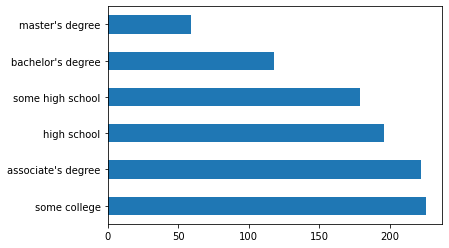

In [18]:
eduData['parental level of education'].value_counts().plot(kind = 'barh')
plt.show()

**Creating Boxplot Lunch vs Subject**

Text(0.5, 1.0, 'Writing Score')

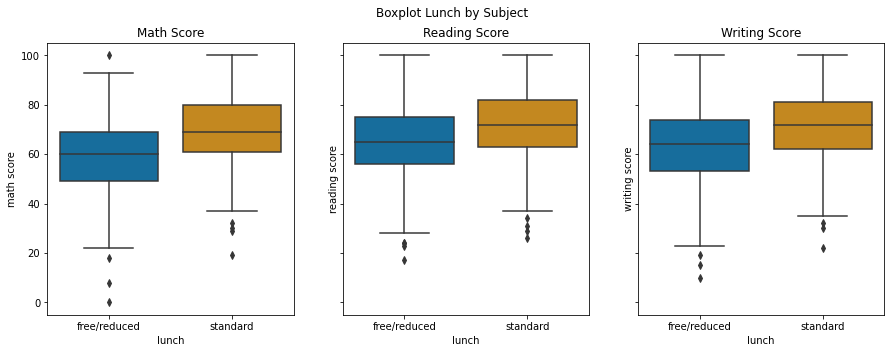

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Boxplot Lunch by Subject')

# Math Score
sns.boxplot(ax=axes[0], y='math score', x='lunch', 
                 data=eduData, 
                 palette="colorblind")
axes[0].set_title("Math Score")


# Reading Score
sns.boxplot(ax=axes[1], y='reading score', x='lunch', 
                 data=eduData, 
                 palette="colorblind")
axes[1].set_title("Reading Score")

# Writing Score
sns.boxplot(ax=axes[2], y='writing score', x='lunch', 
                 data=eduData, 
                 palette="colorblind")
axes[2].set_title("Writing Score")

**Groupby lunch**

In [20]:
print(eduData.groupby(['lunch']).median()[['math score','reading score','writing score']])

print(eduData.groupby(['lunch']).std()[['math score','reading score','writing score']])

              math score  reading score  writing score
lunch                                                 
free/reduced          60             65             64
standard              69             72             72
              math score  reading score  writing score
lunch                                                 
free/reduced   15.159956      14.895339      15.433823
standard       13.653501      13.830602      14.339487


**Creating Boxplot Test Preparation Course vs Subject**

Text(0.5, 1.0, 'Writing Score')

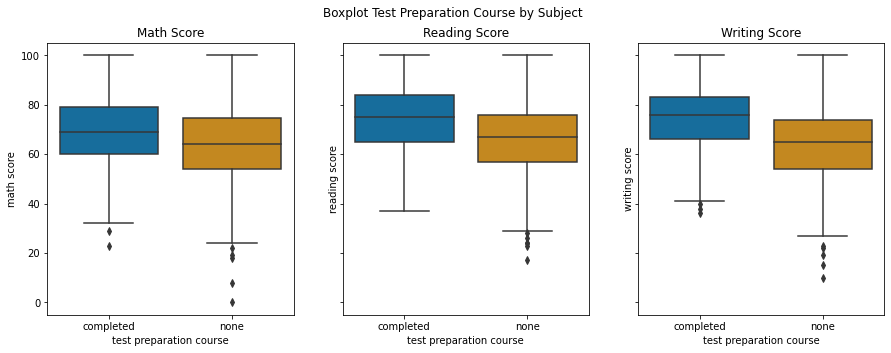

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Boxplot Test Preparation Course by Subject')

# Math Score
sns.boxplot(ax=axes[0], y='math score', x='test preparation course', 
                 data=eduData, 
                 palette="colorblind")
axes[0].set_title("Math Score")


# Reading Score
sns.boxplot(ax=axes[1], y='reading score', x='test preparation course', 
                 data=eduData, 
                 palette="colorblind")
axes[1].set_title("Reading Score")

# Writing Score
sns.boxplot(ax=axes[2], y='writing score', x='test preparation course', 
                 data=eduData, 
                 palette="colorblind")
axes[2].set_title("Writing Score")

**Groupby test preparation course**

In [22]:
print(eduData.groupby(['test preparation course']).median()[['math score','reading score','writing score']])

print(eduData.groupby(['test preparation course']).std()[['math score','reading score','writing score']])

                         math score  reading score  writing score
test preparation course                                          
completed                        69             75             76
none                             64             67             65
                         math score  reading score  writing score
test preparation course                                          
completed                 14.444699      13.638384      13.375335
none                      15.192376      14.463885      14.999661


Data may have positive, negative, or no correlation. It is interesting to describe how associate may be the three subjects. Reading and Writing have more strong association than Reading and Math or Writing and Math.

<AxesSubplot:>

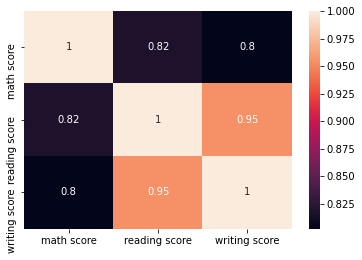

In [23]:
eduCorr = eduData.corr()
sns.heatmap(eduCorr,xticklabels=eduCorr.columns, yticklabels=eduCorr.columns,annot=True)

Data distribution show us the shape the data we analysing, it is very important when we are modeling. There is a cleary linear association between the subjects, that makes sense once students who have good performance in one subject may have good perfomance in other subjects as well.

Also, all the three subjects seems to have a bell shape (condition to the Linear Regression)

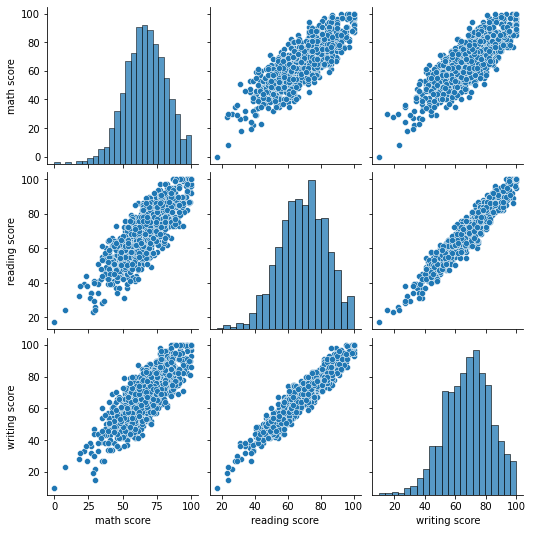

In [24]:
# Data Distribution
sns.pairplot(eduData)

Let's apply a Linear Regression to understating how social background variables may affect the perfomance of the students in the exam.

One tool very useful to test the normality of our data is Q-Q Plot. It is a graphical technique for determining if the data comes from a theorical distribution, in our case we want to check if our data comes from a Normal Distribution. The data seems fit in the Normal Distribution, even if the values in the tail are escaping from our theorical Distribution.

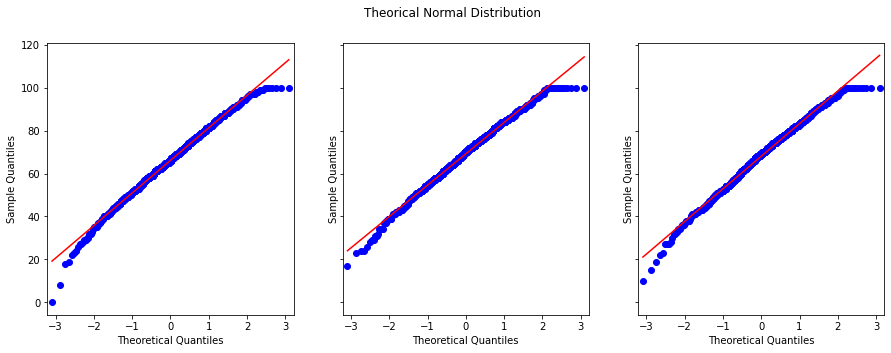

In [25]:
from statsmodels.graphics.gofplots import qqplot

# Clearing Axes
axes[0].clear();axes[1].clear();axes[2].clear()
# Checking Normality
fig.suptitle('Theorical Normal Distribution')

qqplot(eduData['math score'], line = 's', ax = axes[0])
qqplot(eduData['reading score'], line = 's', ax = axes[1])
qqplot(eduData['writing score'], line = 's', ax = axes[2])

**Linear Regression**

- One model that may very powerful and useful is the Linear Regression. There is a full theorical background that explains how the Ordinary Least Square works very well in the attempt to explain the linear relationship between data.

- The relationship between the grade score archive by the students and their social background variables may be describe through Linear Regression. In our case, where the target variable is numerical and the explanatory variables are categorical, we will perform a Linear Regression using dummies variables.


In [26]:
# Preparing Dataset for Linear Regression
eduDataLR = pd.get_dummies(eduData)

# Explanatory Variables
eduDataLR_X = eduDataLR.drop(columns=['math score','reading score', 'writing score'])
eduDataLR_X = sm.add_constant(eduDataLR_X)

- Applying the Linear Regression with Math Score variable as target, we can confirm few evidences already saw in the exploratory analysis. The variable Gender shows us that female perform less than male in Mathmatics (approximately five score points less).

- Also, students who belong to the race/ethnicity group E may obtain much more score from those who belongs to the race/ethnicity group A,B, C or D (approximately ten times more than group A and two times more than group D).

- Parents with Master Degree also shows strong evidence that affect the perfomance of students in the Math Score exame as well Lunch and Course Preparation.

- Importance to notice that for parental level of education_high school, parental level of education_some high school, and race/ethnicity_group A the p-value was not significant.

In [27]:
# Math Score Model
modelMathScore = sm.OLS(eduDataLR['math score'],eduDataLR_X).fit()
modelMathScore.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             math score   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     28.12
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           2.62e-55
Time:                        14:47:38   Log-Likelihood:                -3990.3
No. Observations:                1000   AIC:                             8007.
Df Residuals:                     987   BIC:                             8070.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             23.0302      0.187    123.319      0.000      22.664      23.397
gender_female                                      9.0175      0.428     21.083      0.000       8.178       9.857
gender_male                                       14.0128      0.432     32.452      0.000      13.165      14.860
race/ethnicity_group A                             0.6087      1.195      0.509      0.611      -1.736       2.953
race/ethnicity_group B                             2.6495      0.875      3.028      0.003       0.932       4.367
race/ethnicity_group C                             3.0787      0.728      4.229      0.000       1.650       4.507
race/ethnicity_group D                             5.9498      0.779      7.639      0.000       4.421       7.478
race/ethnicity_group E                            10.7435      0.988     10.869      0.000       8.804      12.683
parental level of education_associate's degree     4.6350      0.857      5.409      0.000       2.953       6.317
parental level of education_bachelor's degree      6.6011      1.097      6.019      0.000       4.449       8.753
parental level of education_high school           -0.1678      0.902     -0.186      0.852      -1.938       1.602
parental level of education_master's degree        7.5234      1.495      5.033      0.000       4.590      10.457
parental level of education_some college           4.0523      0.849      4.772      0.000       2.386       5.719
parental level of education_some high school       0.3863      0.932      0.414      0.679      -1.443       2.216
lunch_free/reduced                                 6.0767      0.466     13.049      0.000       5.163       6.991
lunch_standard                                    16.9535      0.426     39.805      0.000      16.118      17.789
test preparation course_completed                 14.2624      0.467     30.533      0.000      13.346      15.179
test preparation course_none                       8.7678      0.427     20.518      0.000       7.929       9.606
==============================================================================
Omnibus:                        9.026   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                9.201
Skew:                          -0.232   Prob(JB):                       0.0100
Kurtosis:                       2.928   Cond. No.                     1.20e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.11e-29. This might indicate that there are
strong multicollin

- Now, we apply the explanatory variables in a new target variable Reading Score. The results for gender now are the opposite than before for Gender, female perform better in Reading than male (approximately seven score points more). The distances between students between race/ethnicity are less abrupt than before, but still very high.

- The other veraibles follow a similar pattern than the previous analysis.

In [28]:
# Reading Model
modelReadingScore = sm.OLS(eduDataLR['reading score'],eduDataLR_X).fit()
modelReadingScore.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          reading score   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     24.19
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           8.62e-48
Time:                        14:48:43   Log-Likelihood:                -3970.5
No. Observations:                1000   AIC:                             7967.
Df Residuals:                     987   BIC:                             8031.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             24.3079      0.183    132.753      0.000      23.949      24.667
gender_female                                     15.6897      0.419     37.413      0.000      14.867      16.513
gender_male                                        8.6183      0.423     20.357      0.000       7.787       9.449
race/ethnicity_group A                             2.2178      1.171      1.893      0.059      -0.081       4.517
race/ethnicity_group B                             3.5438      0.858      4.130      0.000       1.860       5.228
race/ethnicity_group C                             4.4917      0.714      6.293      0.000       3.091       5.892
race/ethnicity_group D                             6.3234      0.764      8.281      0.000       4.825       7.822
race/ethnicity_group E                             7.7313      0.969      7.977      0.000       5.829       9.633
parental level of education_associate's degree     4.6960      0.840      5.589      0.000       3.047       6.345
parental level of education_bachelor's degree      6.8519      1.075      6.373      0.000       4.742       8.962
parental level of education_high school           -0.2044      0.884     -0.231      0.817      -1.940       1.531
parental level of education_master's degree        8.9010      1.466      6.073      0.000       6.025      11.777
parental level of education_some college           3.4165      0.833      4.104      0.000       1.783       5.050
parental level of education_some high school       0.6469      0.914      0.708      0.479      -1.147       2.441
lunch_free/reduced                                 8.5311      0.457     18.684      0.000       7.635       9.427
lunch_standard                                    15.7769      0.418     37.780      0.000      14.957      16.596
test preparation course_completed                 15.8352      0.458     34.575      0.000      14.936      16.734
test preparation course_none                       8.4727      0.419     20.222      0.000       7.651       9.295
==============================================================================
Omnibus:                       11.191   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.258
Skew:                          -0.242   Prob(JB):                      0.00359
Kurtosis:                       2.812   Cond. No.                     1.20e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.11e-29. This might indicate that there are
strong multicollin

- The Linear Regression for Writing Score target varaible shows very similar results of Reading Score target. Nevertheless, the R-square was a bit better for this modeling.

In [29]:
# Writing Model
modelReadingScore = sm.OLS(eduDataLR['writing score'],eduDataLR_X).fit()
modelReadingScore.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          writing score   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     41.25
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           8.17e-79
Time:                        14:49:17   Log-Likelihood:                -3936.2
No. Observations:                1000   AIC:                             7898.
Df Residuals:                     987   BIC:                             7962.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             24.0046      0.177    135.676      0.000      23.657      24.352
gender_female                                     16.5506      0.405     40.845      0.000      15.755      17.346
gender_male                                        7.4541      0.409     18.222      0.000       6.651       8.257
race/ethnicity_group A                             1.8608      1.132      1.644      0.101      -0.360       4.082
race/ethnicity_group B                             3.0809      0.829      3.716      0.000       1.454       4.708
race/ethnicity_group C                             4.2734      0.690      6.196      0.000       2.920       5.627
race/ethnicity_group D                             7.7915      0.738     10.559      0.000       6.344       9.239
race/ethnicity_group E                             6.9981      0.936      7.473      0.000       5.160       8.836
parental level of education_associate's degree     4.5656      0.812      5.624      0.000       2.973       6.159
parental level of education_bachelor's degree      8.0505      1.039      7.749      0.000       6.012      10.089
parental level of education_high school           -1.2488      0.854     -1.462      0.144      -2.925       0.428
parental level of education_master's degree        9.7488      1.416      6.884      0.000       6.970      12.528
parental level of education_some college           3.6451      0.804      4.531      0.000       2.066       5.224
parental level of education_some high school      -0.7566      0.883     -0.857      0.392      -2.490       0.976
lunch_free/reduced                                 7.9009      0.441     17.909      0.000       7.035       8.767
lunch_standard                                    16.1037      0.404     39.910      0.000      15.312      16.896
test preparation course_completed                 17.0317      0.443     38.486      0.000      16.163      17.900
test preparation course_none                       6.9730      0.405     17.224      0.000       6.179       7.767
==============================================================================
Omnibus:                       16.647   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.222
Skew:                          -0.321   Prob(JB):                     0.000182
Kurtosis:                       2.982   Cond. No.                     1.20e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.11e-29. This might indicate that there are
strong multicollin

- In many times is important to try develop parsimonious, that means, explain the data with the minimum number of parameters posible. Less complex models may describe better the relationship between target and explanatory variables.

- I will try to remove gender and lunch from the model to attempt improve my linear model. I choosed both variables because I believe gender should not affect the perfomance of any student in the exams and lunch because I believe in some way race/ethnicity hold that information implicity.

- Removing gender and lunch.

In [30]:
eduDataReduce = eduData.drop(columns=['gender','lunch'])

# Preparing Dataset for Linear Regression
eduDataLR = pd.get_dummies(eduDataReduce)

# Explanatory Variables
eduDataLR_X = eduDataLR.drop(columns=['math score','reading score', 'writing score', ])
eduDataLR_X = sm.add_constant(eduDataLR_X)

- In all situations the models dimished by removing the variables. The R-square, AIC, and BIC are worst than the previous models. Therefore, my attempt to apply parsimonious did not work.

In [31]:
# Math Score Model
modelMathScore = sm.OLS(eduDataLR['math score'],eduDataLR_X).fit()
modelMathScore.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             math score   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     12.01
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           9.20e-20
Time:                        14:50:35   Log-Likelihood:                -4080.0
No. Observations:                1000   AIC:                             8182.
Df Residuals:                     989   BIC:                             8236.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             36.1137      0.306    118.075      0.000      35.514      36.714
race/ethnicity_group A                             3.1394      1.309      2.398      0.017       0.570       5.709
race/ethnicity_group B                             4.9117      0.955      5.142      0.000       3.037       6.786
race/ethnicity_group C                             5.3764      0.789      6.818      0.000       3.829       6.924
race/ethnicity_group D                             8.5640      0.848     10.101      0.000       6.900      10.228
race/ethnicity_group E                            14.1221      1.080     13.077      0.000      12.003      16.241
parental level of education_associate's degree     7.0020      0.934      7.500      0.000       5.170       8.834
parental level of education_bachelor's degree      8.6435      1.200      7.205      0.000       6.289      10.998
parental level of education_high school            2.3504      0.983      2.392      0.017       0.422       4.279
parental level of education_master's degree        8.7862      1.638      5.363      0.000       5.571      12.001
parental level of education_some college           6.3819      0.925      6.899      0.000       4.566       8.197
parental level of education_some high school       2.9497      1.016      2.903      0.004       0.956       4.944
test preparation course_completed                 20.7115      0.534     38.760      0.000      19.663      21.760
test preparation course_none                      15.4022      0.468     32.928      0.000      14.484      16.320
==============================================================================
Omnibus:                       17.714   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.162
Skew:                          -0.320   Prob(JB):                     0.000114
Kurtosis:                       3.161   Cond. No.                     6.50e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.68e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [32]:
# Reading Model
modelReadingScore = sm.OLS(eduDataLR['reading score'],eduDataLR_X).fit()
modelReadingScore.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          reading score   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     12.94
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           1.92e-21
Time:                        14:50:49   Log-Likelihood:                -4038.0
No. Observations:                1000   AIC:                             8098.
Df Residuals:                     989   BIC:                             8152.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             37.8900      0.293    129.198      0.000      37.315      38.466
race/ethnicity_group A                             3.9036      1.255      3.109      0.002       1.440       6.367
race/ethnicity_group B                             6.5654      0.916      7.168      0.000       4.768       8.363
race/ethnicity_group C                             7.6563      0.756     10.125      0.000       6.172       9.140
race/ethnicity_group D                             8.9056      0.813     10.955      0.000       7.310      10.501
race/ethnicity_group E                            10.8592      1.036     10.487      0.000       8.827      12.891
parental level of education_associate's degree     6.9629      0.895      7.778      0.000       5.206       8.720
parental level of education_bachelor's degree      9.0764      1.150      7.891      0.000       6.819      11.334
parental level of education_high school            1.7138      0.942      1.819      0.069      -0.135       3.563
parental level of education_master's degree       11.4111      1.571      7.264      0.000       8.328      14.494
parental level of education_some college           5.7167      0.887      6.445      0.000       3.976       7.457
parental level of education_some high school       3.0092      0.974      3.089      0.002       1.097       4.921
test preparation course_completed                 22.5133      0.512     43.940      0.000      21.508      23.519
test preparation course_none                      15.3768      0.449     34.284      0.000      14.497      16.257
==============================================================================
Omnibus:                       10.229   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.395
Skew:                          -0.238   Prob(JB):                      0.00553
Kurtosis:                       2.850   Cond. No.                     6.50e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.68e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [33]:
# Writing Model
modelReadingScore = sm.OLS(eduDataLR['writing score'],eduDataLR_X).fit()
modelReadingScore.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          writing score   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     22.07
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           1.63e-37
Time:                        14:51:03   Log-Likelihood:                -4038.7
No. Observations:                1000   AIC:                             8099.
Df Residuals:                     989   BIC:                             8153.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             37.5049      0.293    127.789      0.000      36.929      38.081
race/ethnicity_group A                             3.2920      1.256      2.620      0.009       0.826       5.757
race/ethnicity_group B                             6.1832      0.917      6.746      0.000       4.384       7.982
race/ethnicity_group C                             7.5501      0.757      9.977      0.000       6.065       9.035
race/ethnicity_group D                            10.3257      0.814     12.692      0.000       8.729      11.922
race/ethnicity_group E                            10.1539      1.036      9.798      0.000       8.120      12.187
parental level of education_associate's degree     6.8066      0.896      7.598      0.000       5.049       8.565
parental level of education_bachelor's degree     10.2617      1.151      8.914      0.000       8.003      12.521
parental level of education_high school            0.5503      0.943      0.584      0.560      -1.300       2.400
parental level of education_master's degree       12.3677      1.572      7.867      0.000       9.283      15.453
parental level of education_some college           5.9299      0.888      6.680      0.000       4.188       7.672
parental level of education_some high school       1.5886      0.975      1.629      0.104      -0.325       3.502
test preparation course_completed                 23.6485      0.513     46.121      0.000      22.642      24.655
test preparation course_none                      13.8564      0.449     30.871      0.000      12.976      14.737
==============================================================================
Omnibus:                       10.952   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.211
Skew:                          -0.257   Prob(JB):                      0.00368
Kurtosis:                       2.924   Cond. No.                     6.50e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.68e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""